In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/working/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:

import os
import numpy as np
from PIL import Image

# Define the data directories
root_dir = os.path.join('/kaggle/input/malayakew-plant-leaf-dataset/MK/D1', 'D1')
# train_dir = os.path.join(root_dir, 'train')
class_3_tr="/kaggle/input/malayakew-plant-leaf-dataset/MK/D1/train/Class (3)"
class_30_tr="/kaggle/input/malayakew-plant-leaf-dataset/MK/D1/train/Class (30)"
class_3_test="/kaggle/input/malayakew-plant-leaf-dataset/MK/D1/test/Class (3)"
class_30_test="/kaggle/input/malayakew-plant-leaf-dataset/MK/D1/test/Class (30)"

# Initialize the image and label arrays
train_images = []
test_images = []
train_labels = []
test_labels = []

l=0
# Load images from class 3 and set labels to 0
for filename in os.listdir(os.path.join(class_3_tr)):
    image_path = os.path.join(class_3_tr, filename)
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image = np.array(image)
#     image = image.reshape((1, 224, 224, 3))
    train_images.append(image)
    train_labels.append(l)
    
    
# # Load images from class 3 and set labels to 0
for filename in os.listdir(os.path.join(class_3_test)):
    image_path = os.path.join(class_3_test, filename)
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image = np.array(image)
#     image = image.reshape((1, 224, 224, 3))
    test_images.append(image)
    test_labels.append(l)   
l+=1
# Load images from class 30 and set labels to 1
for filename in os.listdir(os.path.join(class_30_tr)):
    image_path = os.path.join(class_30_tr, filename)
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image = np.array(image)
#     image = image.reshape((1, 224, 224, 3))
    train_images.append(image)
    train_labels.append(l)

    
    
# Load images from class 3 and set labels to 0
for filename in os.listdir(os.path.join(class_30_test)):
    image_path = os.path.join(class_30_test, filename)
    image = Image.open(image_path)
    image = image.resize((224, 224))
    image = np.array(image)
#     image = image.reshape((1, 224, 224, 3))
    test_images.append(image)
    test_labels.append(l)

# Convert image and label arrays to NumPy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Print the shape of the image and label arrays
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)
train_images = train_images / 255.0
test_images = test_images / 255.0

(104, 224, 224, 3)
(104,)
(24, 224, 224, 3)
(24,)


In [4]:




from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generato = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
 
)

def augmentation_dataset(dataset):
    aug = []
    n=5000
    for img in dataset:
        img = np.expand_dims(img, axis=0)  
        for _ in range(3):  
            seed_num = np.random.randint(0, n)  
            for batch in data_generato.flow(img, batch_size=1, seed=seed_num):
                aug.append(np.squeeze(batch))  
                break  
    return np.array(aug)

aug_X_train = augmentation_dataset(train_images)

aug_X_test = augmentation_dataset(test_images)

aug_y_train = np.repeat(train_labels, 3, axis=0)  

aug_y_test = np.repeat(test_labels, 3, axis=0)


print("aug_X_train shape:", aug_X_train.shape)
print("aug_X_test shape:", aug_X_test.shape)
print("aug_y_train shape:", aug_y_train.shape)
print("aug_y_test shape:", aug_y_test.shape)


aug_X_train shape: (312, 224, 224, 3)
aug_X_test shape: (72, 224, 224, 3)
aug_y_train shape: (312,)
aug_y_test shape: (72,)


In [5]:
X_train = np.concatenate((train_images, aug_X_train))
X_test = np.concatenate((test_images, aug_X_test))
y_train = np.concatenate((train_labels, aug_y_train))
y_test = np.concatenate((test_labels, aug_y_test))
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (416, 224, 224, 3)
X_test shape: (96, 224, 224, 3)
y_train shape: (416,)
y_test shape: (96,)


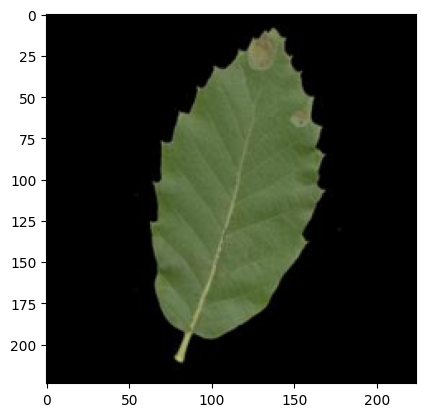

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(X_train[50])
plt.show()

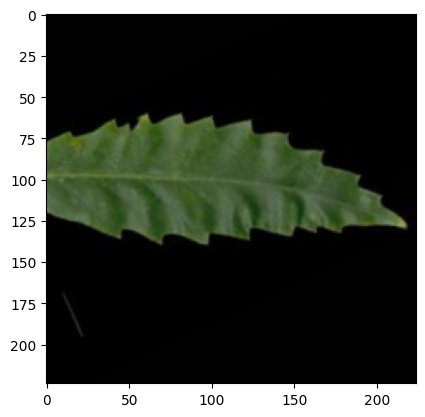

In [6]:

plt.imshow(X_test[90])
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.callbacks import EarlyStopping


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()



58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                         

In [8]:
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import backend as K
metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.F1Score()]

early_stopping_monitor = EarlyStopping(patience = 2)
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = metrics)
history=model.fit(X_train, y_train.astype('float32'),epochs=3,batch_size=100,validation_split=0.2,callbacks = [early_stopping_monitor])

Epoch 1/3
4/4 [==============================] - 78s 19s/step - loss: 1.3454 - accuracy: 0.5542 - auc: 0.5219 - recall: 0.4274 - precision: 0.4077 - f1_score: 0.5439 - val_loss: 0.8761 - val_accuracy: 0.2619 - val_auc: 0.0000e+00 - val_recall: 0.2619 - val_precision: 1.0000 - val_f1_score: 1.0000
Epoch 2/3
4/4 [==============================] - 81s 21s/step - loss: 0.9159 - accuracy: 0.6536 - auc: 0.7208 - recall: 0.2500 - precision: 0.5849 - f1_score: 0.5439 - val_loss: 0.6860 - val_accuracy: 0.5476 - val_auc: 0.0000e+00 - val_recall: 0.5476 - val_precision: 1.0000 - val_f1_score: 1.0000
Epoch 3/3
4/4 [==============================] - 81s 21s/step - loss: 0.5727 - accuracy: 0.7620 - auc: 0.8176 - recall: 0.7097 - precision: 0.6718 - f1_score: 0.5439 - val_loss: 0.2108 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_recall: 1.0000 - val_precision: 1.0000 - val_f1_score: 1.0000


In [9]:
model.evaluate(X_test, y_test.astype('float32'))

3/3 [==============================] - 17s 6s/step - loss: 0.1398 - accuracy: 0.9896 - auc: 1.0000 - recall: 0.9792 - precision: 1.0000 - f1_score: 0.6667


[0.13978524506092072,
 0.9895833134651184,
 1.0,
 0.9791666865348816,
 1.0,
 array([0.6666667], dtype=float32)]

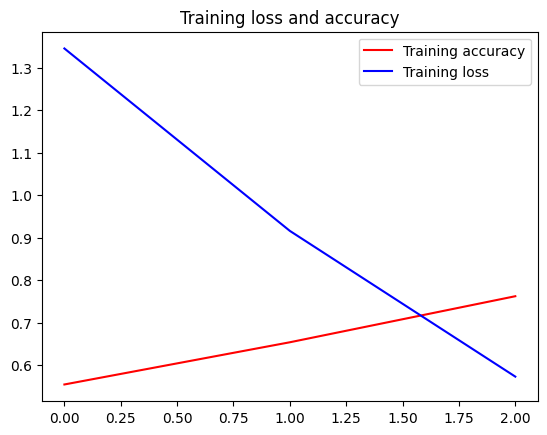

<Figure size 640x480 with 0 Axes>

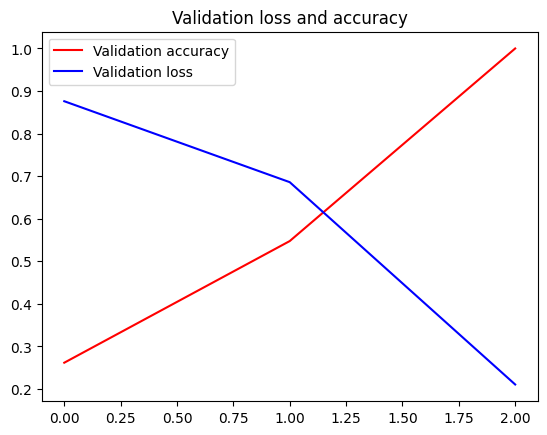

<Figure size 640x480 with 0 Axes>

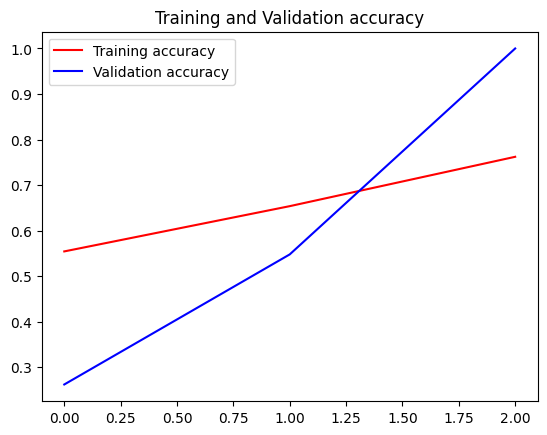

<Figure size 640x480 with 0 Axes>

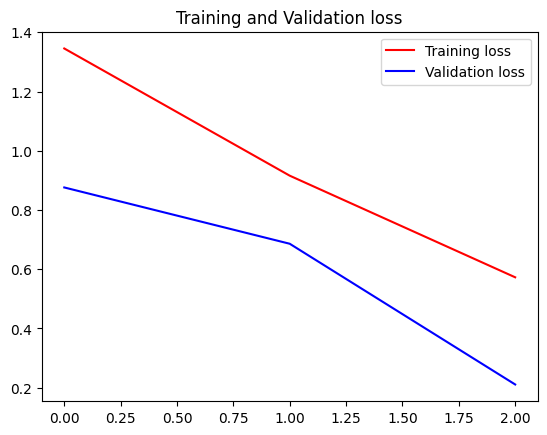

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs,accuracy,'r',label="Training accuracy")
plt.plot(epochs,loss,'b',label="Training loss")
plt.title('Training loss and accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs,val_accuracy,'r',label="Validation accuracy")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Validation loss and accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs,accuracy,'r',label="Training accuracy")
plt.plot(epochs,val_accuracy,'b',label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Training and Validation loss')
plt.legend()
plt.figure()
plt.show()